# Report on CTM MILP Model - Alpha vs Demand

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle("alpha-vs-demand.pkl")
df.head()

,alpha,delay,demand,flow_weight,runtime,throughput
0,0.0,927.742616,450,0.6,8.564021,44.556962
1,0.0,1068.390061,500,0.6,2.483179,44.556962
2,0.0,1229.851383,550,0.6,1.630084,44.556962
3,0.0,1400.423347,600,0.6,1.876187,44.556962
4,0.0,1599.285513,650,0.6,2.135975,44.556962


Text(0.5,1,'Total throughput heatmap (veh)')

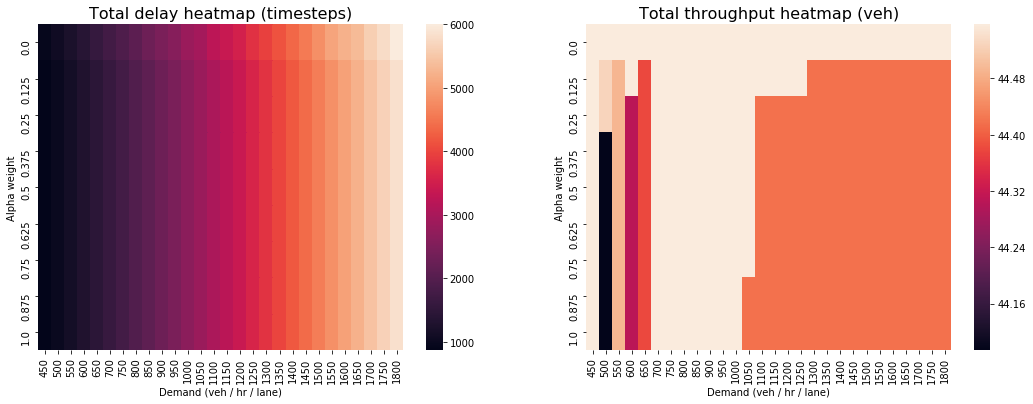

In [8]:
df_delaymap = df.pivot(index='alpha', columns='demand', values='delay')
df_throughputmap = df.pivot(index='alpha', columns='demand', values='throughput')

_, axs = plt.subplots(1,2,figsize=(18,6))

sns.heatmap(df_delaymap, ax=axs[0])
sns.heatmap(df_throughputmap, ax=axs[1])

axs[0].set_xlabel("Demand (veh / hr / lane)")
axs[0].set_ylabel("Alpha weight")
axs[0].set_title("Total delay heatmap (timesteps)", fontsize=16)

axs[1].set_xlabel("Demand (veh / hr / lane)")
axs[1].set_ylabel("Alpha weight")
axs[1].set_title("Total throughput heatmap (veh)", fontsize=16)

The heatmaps show that the value of alpha doesn't affect the total delay, and that neither the value of alpha nor the symmetric traffic demand significantly affect the total throughput.

This could mean that in the symmetric case, the objective values of delay and throughput are related and independent from the weights given to them.

Text(0.5,1,'Total runtime heatmap (timesteps)')

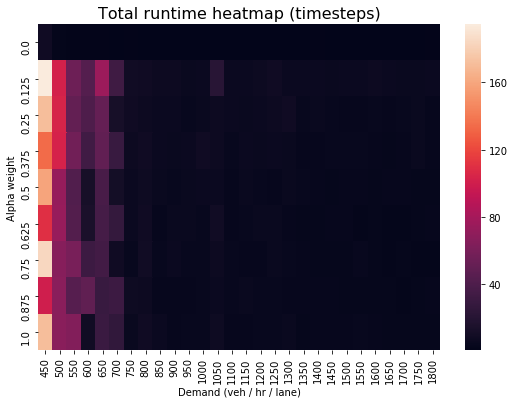

In [9]:
df_runtimemap = df.pivot(index='alpha', columns='demand', values='runtime')

_, ax = plt.subplots(1,1,figsize=(9,6))

sns.heatmap(df_runtimemap, ax=ax)

ax.set_xlabel("Demand (veh / hr / lane)")
ax.set_ylabel("Alpha weight")
ax.set_title("Total runtime heatmap (timesteps)", fontsize=16)

The same could be said for the runtime of the model, where only the demand seemed to affect the runtime in any significant manner. That being said, runtimes were significantly lower when alpha was 0, suggesting that computing for solely throughput is the fastest method.

Note that these tests were run on symmetric traffic demands. Different results may arise if the traffic demand was instead asymmetric.

### Green times

The resulting greentime graphs when running the model on different alpha and demand values can be found in this link, under the `alpha_vs_demand_greentimes` folder:

[https://drive.google.com/drive/folders/18T8UheOve4sCsyWZqTM97soojWhPCwy4?usp=sharing](https://drive.google.com/drive/folders/18T8UheOve4sCsyWZqTM97soojWhPCwy4?usp=sharing)

The images are labeled in the format `<demand>vph_<alpha>alpha_<flow-weight>flow_greentime.png`, which indicate the greentimes when running the model with a symmetric traffic demand of `demand`, alpha value of `alpha`, and flow maximization term of `flow-weight`.

### Verdict

Additional runs may be performed for asymmetric cases, so as to see the effect of alpha on the total delay and throughput.

As for the greentimes, slight periodicity was observed on some of the greentime graphs, but unfortunately not for all cases.